In [1]:
!pip install yfinance tensorflow scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 15.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-macosx_11_0_arm64.whl size=264312 sha256=7394250aee7937d3e3e9388747aa4729ec3c56b62d25c731371ccb167176b593
  Stored in directory: /Users/khandil/Library/Caches/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 5.6932e-05 - val_loss: 9.2057e-04
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4.5502e-05 - val_loss: 0.0014
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4.6404e-05 - val_loss: 7.6181e-04
Epoch 5/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4.4656e-05 - val_loss: 5.3540e-04
Epoch 6/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 4.7488e-05 - val_loss: 4.5498e-04
Epoch 7/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3.4732e-05 - val_loss: 4.8880e-04
Epoch 8/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 3.4767e-05 - val_loss: 0.0011
Epoch 9/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.7789e-05 - val_loss: 3.7714e-04
Epoch 10/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 2.6947e-05 - val_loss: 0.0010


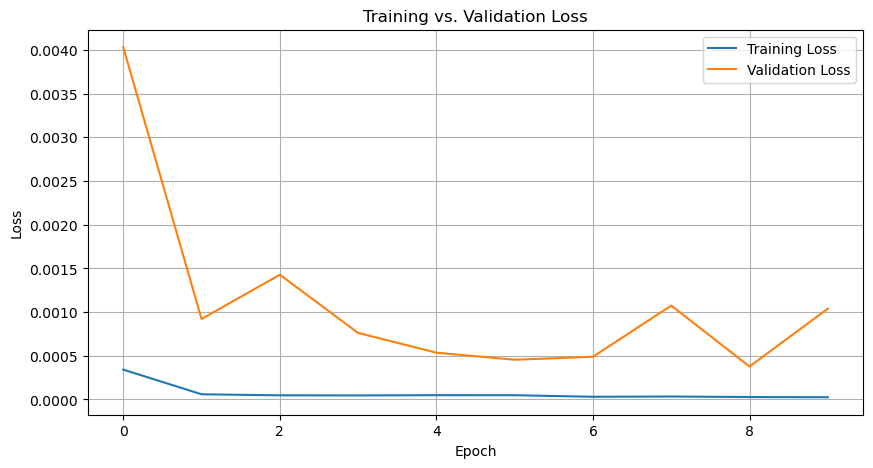

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


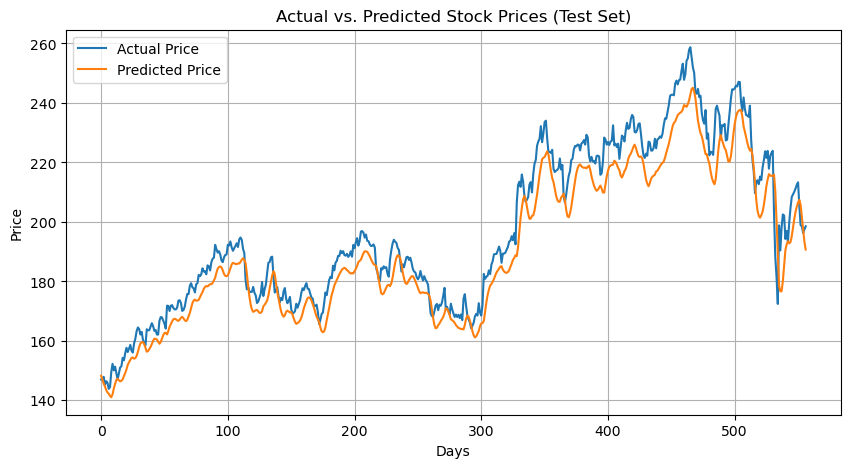

RMSE: 8.34


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Step 1: Load the CSV 
df = pd.read_csv("aapl-36831818-90cf-4afa-b251-b86837e30d07.csv")

# Step 2: Keep only 'Close' column and reset index
df = df[["Close"]].reset_index(drop=True)

# Step 3: Scale the data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[["Close"]])

# Step 4: Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Simulate 1980-2023 (train) vs 2023-2025 (test)
# Using first 95% of rows as train, last 5% as test
split = int(len(X) * 0.95)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 5: Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape(-1, seq_length, 1)
X_test = X_test.reshape(-1, seq_length, 1)

# Step 6: Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(32))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,             # increased epochs for better convergence
    batch_size=32,
    verbose=1
)

# Step 8: Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Model architecture diagram
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_architecture.png")

# Step 10: Predict future prices (test set)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 11: Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Actual vs. Predicted Stock Prices (Test Set)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 12: Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test_actual) ** 2))
print(f"RMSE: {rmse:.2f}")


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz pydot


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'


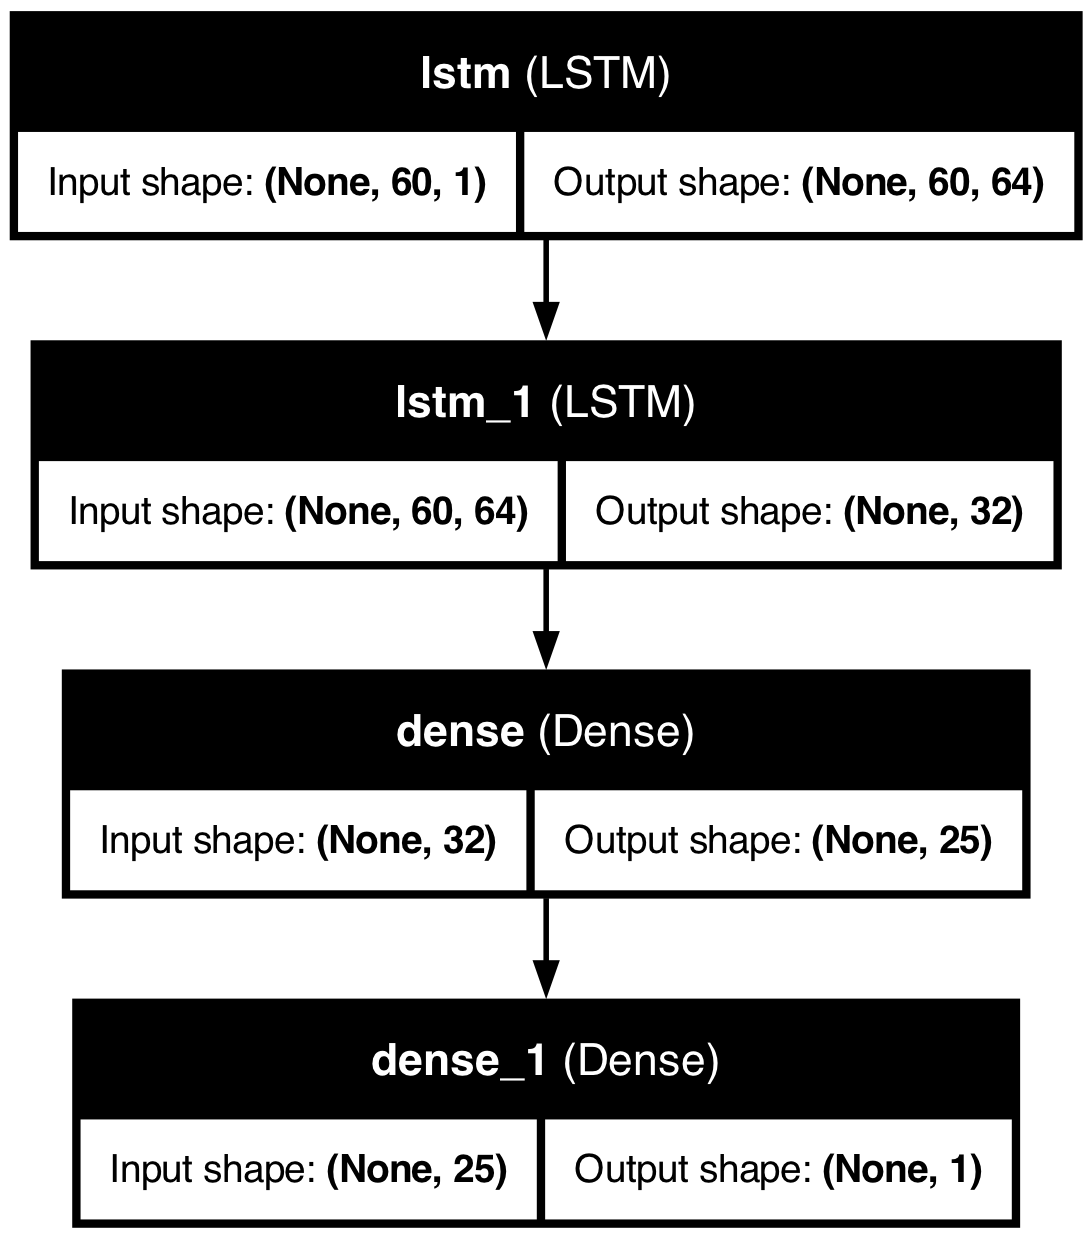

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_architecture.png")
